In [27]:
# import libraries

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, cohen_kappa_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict

RSEED=42

In [28]:
# read data
df=pd.read_csv('/Users/annelahann/neue-fische/RiffRefine/data/data_with_target.csv')
df.head()


,Unnamed: 0,track_id,album_comments,album_date_created,album_favorites,album_id,album_listens,album_title,album_tracks,album_type,...,soundcloud_website,track_title_char_count,album_information_bin,artist_bio_bin,months_life,listens_month,bonus_listens,listens_incl_bonus,listens_bins,genre_pred
0,0,2,0,2008-11-26 01:44:45,4,1,6073,AWOL - A Way Of Life,7,Album,...,False,4,1,1,101,12.801980,0.0,1293.0,2,2
1,1,5,0,2008-11-26 01:44:45,4,1,6073,AWOL - A Way Of Life,7,Album,...,False,10,1,1,101,11.396040,0.0,1151.0,1,2
2,2,10,0,2008-11-26 01:45:08,4,6,47632,Constant Hitmaker,2,Album,...,False,7,0,1,101,496.386139,0.0,50135.0,4,1
3,3,140,1,2008-11-26 01:49:59,1,61,1300,The Blind Spot,1,Album,...,False,18,1,1,101,12.861386,0.0,1299.0,2,1
4,4,141,0,2008-11-26 01:49:57,1,60,1304,Every Man For Himself,2,Album,...,False,4,1,1,101,7.178218,0.0,725.0,1,1


In [29]:
df['listens_bins']=df['listens_bins']-1
df['listens_bins'].value_counts()

listens_bins
1    2054
2    2053
3    1960
0    1933
Name: count, dtype: int64

In [30]:
# Define predictors and target variable
mfcc = [col for col in df.columns if col.startswith('mfcc_max')]
chroma = [col for col in df.columns if col.startswith('chroma')]
#chroma1 = [col for col in df.columns if col.startswith('chroma_stft_mean')]
#chroma2 = [col for col in df.columns if col.startswith('chroma_cqt_mean')]
#chroma3 = [col for col in df.columns if col.startswith('chroma_cens_mean')]
rmse = [col for col in df.columns if col.startswith('rmse')]
zcr = [col for col in df.columns if col.startswith('zcr')]
spectral = [col for col in df.columns if col.startswith('spectral')]
#spectral1 = [col for col in df.columns if col.startswith('spectral_rolloff_mean')]
#spectral2 = [col for col in df.columns if col.startswith('spectral_bandwith_mean')]
#spectral3 = [col for col in df.columns if col.startswith('spectral_centroid_mean')]
#spectral4 = [col for col in df.columns if col.startswith('spectral_contrast_mean')]
tonnetz = [col for col in df.columns if col.startswith('tonnetz')]

X = df[['track_genre_top','track_bit_rate','track_duration','album_information_bin','album_tracks','other_website','soundcloud_website','artist_bio_bin','track_title_char_count']]
y = df['listens_bins']
print(f"We have {X.shape[0]} observations in our dataset and {X.shape[1]} features")
print(f"Our target vector has also {y.shape[0]} values")


We have 8000 observations in our dataset and 9 features
Our target vector has also 8000 values


In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   track_genre_top         8000 non-null   object
 1   track_bit_rate          8000 non-null   int64 
 2   track_duration          8000 non-null   int64 
 3   album_information_bin   8000 non-null   int64 
 4   album_tracks            8000 non-null   int64 
 5   other_website           8000 non-null   bool  
 6   soundcloud_website      8000 non-null   bool  
 7   artist_bio_bin          8000 non-null   int64 
 8   track_title_char_count  8000 non-null   int64 
dtypes: bool(2), int64(6), object(1)
memory usage: 453.3+ KB


In [32]:
#OnehotEncoding genre

X = pd.get_dummies(X, columns=['track_genre_top'], drop_first=True)


In [33]:
# Split into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
X_test

X_train shape: (6400, 15)
X_test shape: (1600, 15)
y_train shape: (6400,)
y_test shape: (1600,)


,track_bit_rate,track_duration,album_information_bin,album_tracks,other_website,soundcloud_website,artist_bio_bin,track_title_char_count,track_genre_top_Experimental,track_genre_top_Folk,track_genre_top_Hip-Hop,track_genre_top_Instrumental,track_genre_top_International,track_genre_top_Pop,track_genre_top_Rock
2215,320000,209,1,12,True,False,0,9,False,False,False,False,False,True,False
2582,256000,275,1,31,False,False,1,11,False,False,False,False,False,False,True
1662,256000,255,1,32,True,False,1,11,False,False,False,False,True,False,False
3027,320000,265,1,9,True,False,1,14,False,False,False,False,False,False,False
4343,228446,494,1,19,False,True,1,27,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,320000,320,1,11,True,False,0,16,False,False,False,False,False,False,False
7979,320000,201,1,8,True,False,1,19,False,False,False,True,False,False,False
1115,320000,297,1,3,True,False,1,7,True,False,False,False,False,False,False
6093,320000,251,1,8,True,False,1,44,False,False,True,False,False,False,False


In [34]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled


array([[ 0.80081919, -0.39231651,  0.48309243, ...,  2.67060806,
        -0.3790436 , -0.37525986],
       [-1.25900183,  0.06557926, -2.06999723, ..., -0.37444656,
        -0.3790436 , -0.37525986],
       [-0.15134508, -1.07407243,  0.48309243, ..., -0.37444656,
        -0.3790436 , -0.37525986],
       ...,
       [ 0.89673488, -0.24986005,  0.48309243, ..., -0.37444656,
         2.63821891, -0.37525986],
       [ 0.89673488,  1.81575863,  0.48309243, ..., -0.37444656,
        -0.3790436 , -0.37525986],
       [-0.12597827, -0.86038773,  0.48309243, ..., -0.37444656,
        -0.3790436 , -0.37525986]])

In [35]:
from xgboost import XGBClassifier, plot_importance

xgb = XGBClassifier(random_state=RSEED, tree_method="hist",max_depth=5,gamma=1.0,learning_rate=0.1,reg_lambda=2,scale_pos_weight=1,n_estimators=75)
xgb.fit(X_train_scaled, y_train)

/Users/annelahann/neue-fische/RiffRefine/.venv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:57:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
y_train_pred_xgb = xgb.predict(X_train_scaled)
y_test_pred_xgb = xgb.predict(X_test_scaled)

In [37]:
conf_matrix= confusion_matrix(y_train, y_train_pred_xgb)
accurate_classes = sum([conf_matrix[i][i] for i in range(len(conf_matrix))])
off_by_one = sum([conf_matrix[i][j] if abs(i - j) == 1 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])
off_by_two = sum([conf_matrix[i][j] if abs(i - j) == 2 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])
off_by_three = sum([conf_matrix[i][j] if abs(i - j) == 3 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])
#off_by_four = sum([conf_matrix[i][j] if abs(i - j) == 4 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])

print((100*accurate_classes/conf_matrix.sum()).round(1))
print((100*off_by_one/conf_matrix.sum()).round(1))
print((100*off_by_two/conf_matrix.sum()).round(1))
print((100*off_by_three/conf_matrix.sum()).round(1))
#print((100*off_by_four/conf_matrix.sum()).round(1))
print('--------------------------------')
print(cohen_kappa_score(y_train, y_train_pred_xgb,weights='linear').round(3))

58.5
30.4
8.5
2.5
--------------------------------
0.578


In [38]:
conf_matrix= confusion_matrix(y_test, y_test_pred_xgb)
accurate_classes = sum([conf_matrix[i][i] for i in range(len(conf_matrix))])
off_by_one = sum([conf_matrix[i][j] if abs(i - j) == 1 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])
off_by_two = sum([conf_matrix[i][j] if abs(i - j) == 2 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])
off_by_three = sum([conf_matrix[i][j] if abs(i - j) == 3 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])
#off_by_four = sum([conf_matrix[i][j] if abs(i - j) == 4 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])

print((100*accurate_classes/conf_matrix.sum()).round(1))
print((100*off_by_one/conf_matrix.sum()).round(1))
print((100*off_by_two/conf_matrix.sum()).round(1))
print((100*off_by_three/conf_matrix.sum()).round(1))
#print((100*off_by_four/conf_matrix.sum()).round(1))
print('--------------------------------')
print(cohen_kappa_score(y_test, y_test_pred_xgb,weights='linear').round(3))

54.4
33.6
9.2
2.8
--------------------------------
0.532


In [39]:
kappa_scorer = make_scorer(cohen_kappa_score)

In [40]:
grid_params = {
    'n_estimators': [70,100],
    'gamma': [0.5,1.0,1.2],
     #'reg_lambda': [1.0,2.0,5.0],
    'max_depth': [5,8],
    'learning_rate': [0.01,0.1,0.5]
}

gs = GridSearchCV(
    XGBClassifier(random_state=RSEED, tree_method="hist"),
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1,
    scoring=kappa_scorer)

In [41]:
xgb_gs = gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [42]:
xgb_gs.best_params_

{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

In [43]:
best_model = xgb_gs.best_estimator_

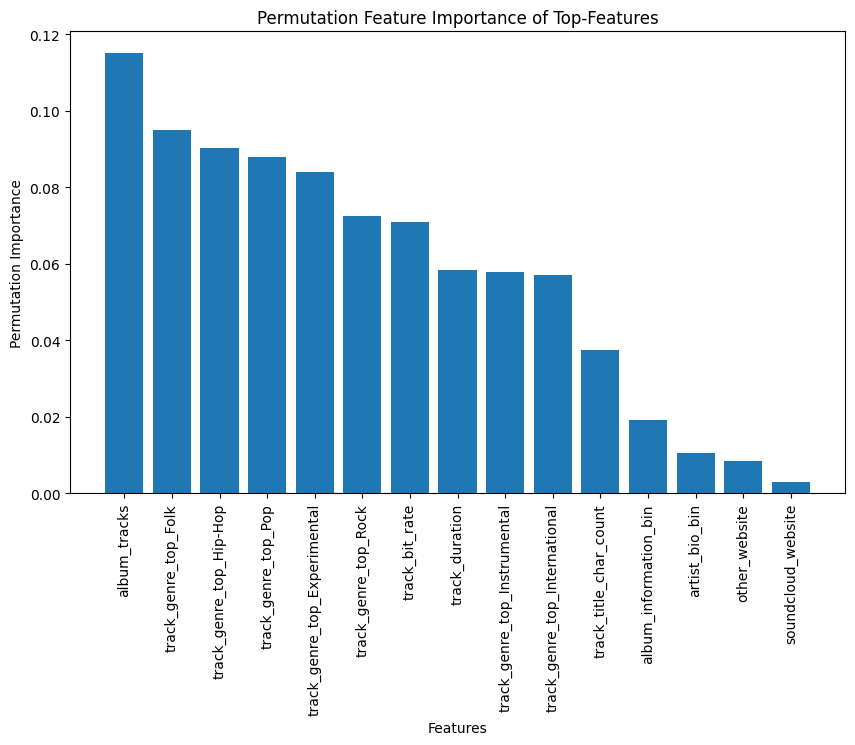

In [44]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_model, X_train_scaled, y_train,random_state=RSEED)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]
feature_names = X.columns.tolist() 
top_features = 15  
plt.figure(figsize=(10, 6))
plt.bar(range(top_features), perm_importance.importances_mean[sorted_idx][:top_features], align="center")
plt.xticks(range(top_features), [feature_names[i] for i in sorted_idx[:top_features]], rotation=90)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance of Top-Features')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

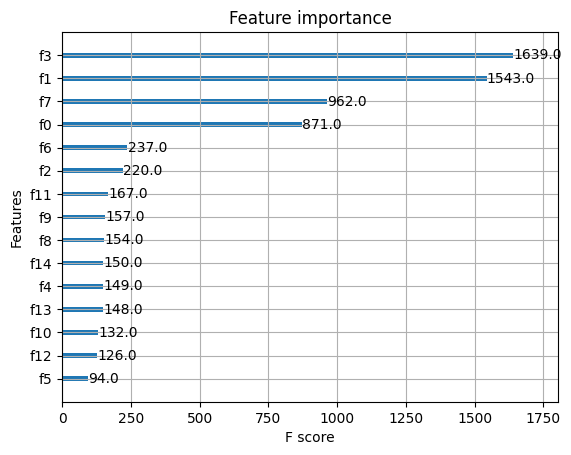

In [45]:
plot_importance(best_model, max_num_features = 15)

In [46]:
y_train_pred_xgb = best_model.predict(X_train_scaled)
y_test_pred_xgb = best_model.predict(X_test_scaled)

In [47]:
conf_matrix= confusion_matrix(y_train, y_train_pred_xgb)
accurate_classes = sum([conf_matrix[i][i] for i in range(len(conf_matrix))])
off_by_one = sum([conf_matrix[i][j] if abs(i - j) == 1 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])
off_by_two = sum([conf_matrix[i][j] if abs(i - j) == 2 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])
off_by_three = sum([conf_matrix[i][j] if abs(i - j) == 3 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])

print((100*accurate_classes/conf_matrix.sum()).round(1))
print((100*off_by_one/conf_matrix.sum()).round(1))
print((100*off_by_two/conf_matrix.sum()).round(1))
print((100*off_by_three/conf_matrix.sum()).round(1))
print('--------------------------------')
print(cohen_kappa_score(y_train, y_train_pred_xgb,weights='linear').round(3))

65.3
25.4
7.4
1.9
--------------------------------
0.646


In [48]:
conf_matrix= confusion_matrix(y_test, y_test_pred_xgb)
accurate_classes = sum([conf_matrix[i][i] for i in range(len(conf_matrix))])
off_by_one = sum([conf_matrix[i][j] if abs(i - j) == 1 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])
off_by_two = sum([conf_matrix[i][j] if abs(i - j) == 2 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])
off_by_three = sum([conf_matrix[i][j] if abs(i - j) == 3 else 0 for i in range(len(conf_matrix)) for j in range(len(conf_matrix))])

print((100*accurate_classes/conf_matrix.sum()).round(1))
print((100*off_by_one/conf_matrix.sum()).round(1))
print((100*off_by_two/conf_matrix.sum()).round(1))
print((100*off_by_three/conf_matrix.sum()).round(1))
print('--------------------------------')
print(cohen_kappa_score(y_test, y_test_pred_xgb,weights='linear').round(3))


56.0
33.9
8.1
1.9
--------------------------------
0.56


In [49]:
y_test = pd.Series(y_test)
y_test_pred_xgb = pd.Series(y_test_pred_xgb)

X_test=pd.DataFrame(X_test)

X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)
y_test_pred_xgb_reset = y_test_pred_xgb.reset_index(drop=True)

X_test_preds = pd.concat([X_test_reset, y_test_reset, y_test_pred_xgb_reset], axis=1)
X_test_preds.columns = list(X_test_reset.columns) + ['y_test', 'y_test_pred_xgb']

X_test_preds

,track_bit_rate,track_duration,album_information_bin,album_tracks,other_website,soundcloud_website,artist_bio_bin,track_title_char_count,track_genre_top_Experimental,track_genre_top_Folk,track_genre_top_Hip-Hop,track_genre_top_Instrumental,track_genre_top_International,track_genre_top_Pop,track_genre_top_Rock,y_test,y_test_pred_xgb
0,320000,209,1,12,True,False,0,9,False,False,False,False,False,True,False,3,0
1,256000,275,1,31,False,False,1,11,False,False,False,False,False,False,True,2,3
2,256000,255,1,32,True,False,1,11,False,False,False,False,True,False,False,2,0
3,320000,265,1,9,True,False,1,14,False,False,False,False,False,False,False,3,3
4,228446,494,1,19,False,True,1,27,False,False,False,False,False,False,False,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,320000,320,1,11,True,False,0,16,False,False,False,False,False,False,False,2,3
1596,320000,201,1,8,True,False,1,19,False,False,False,True,False,False,False,3,3
1597,320000,297,1,3,True,False,1,7,True,False,False,False,False,False,False,1,1
1598,320000,251,1,8,True,False,1,44,False,False,True,False,False,False,False,1,1


In [50]:
X_test_preds['misclass'] = (X_test_preds['y_test'] != X_test_preds['y_test_pred_xgb']).astype(int)
X_test_preds

,track_bit_rate,track_duration,album_information_bin,album_tracks,other_website,soundcloud_website,artist_bio_bin,track_title_char_count,track_genre_top_Experimental,track_genre_top_Folk,track_genre_top_Hip-Hop,track_genre_top_Instrumental,track_genre_top_International,track_genre_top_Pop,track_genre_top_Rock,y_test,y_test_pred_xgb,misclass
0,320000,209,1,12,True,False,0,9,False,False,False,False,False,True,False,3,0,1
1,256000,275,1,31,False,False,1,11,False,False,False,False,False,False,True,2,3,1
2,256000,255,1,32,True,False,1,11,False,False,False,False,True,False,False,2,0,1
3,320000,265,1,9,True,False,1,14,False,False,False,False,False,False,False,3,3,0
4,228446,494,1,19,False,True,1,27,False,False,False,False,False,False,False,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,320000,320,1,11,True,False,0,16,False,False,False,False,False,False,False,2,3,1
1596,320000,201,1,8,True,False,1,19,False,False,False,True,False,False,False,3,3,0
1597,320000,297,1,3,True,False,1,7,True,False,False,False,False,False,False,1,1,0
1598,320000,251,1,8,True,False,1,44,False,False,True,False,False,False,False,1,1,0


<Axes: xlabel='y_test', ylabel='count'>

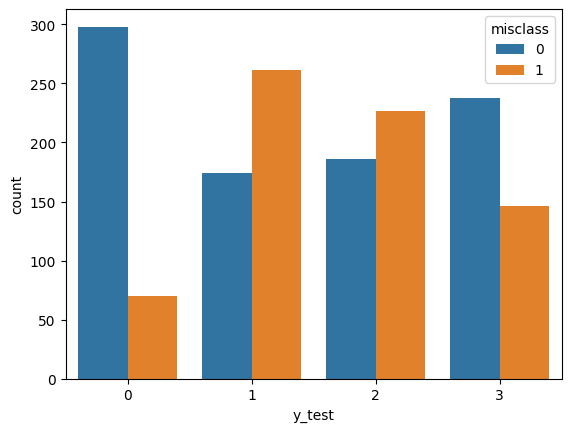

In [51]:

sns.countplot(data=X_test_preds, x='y_test', hue='misclass')

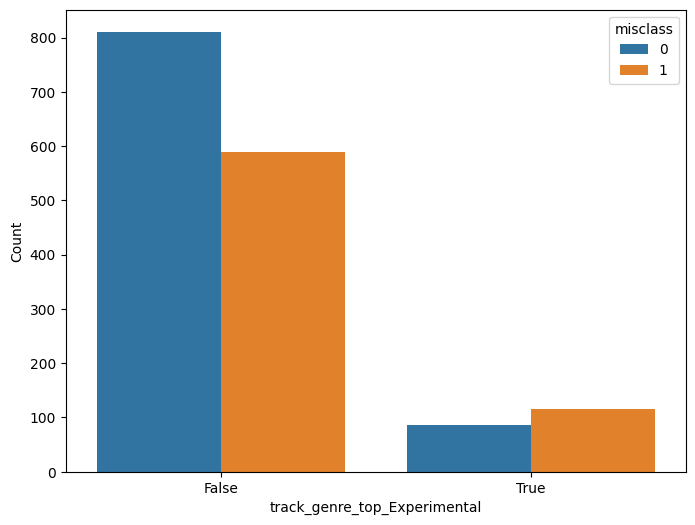

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(data=X_test_preds, x=X_test_preds['track_genre_top_Experimental'], hue='misclass')
#plt.title(f'Count plot for {column}')
plt.ylabel('Count')
plt.show()



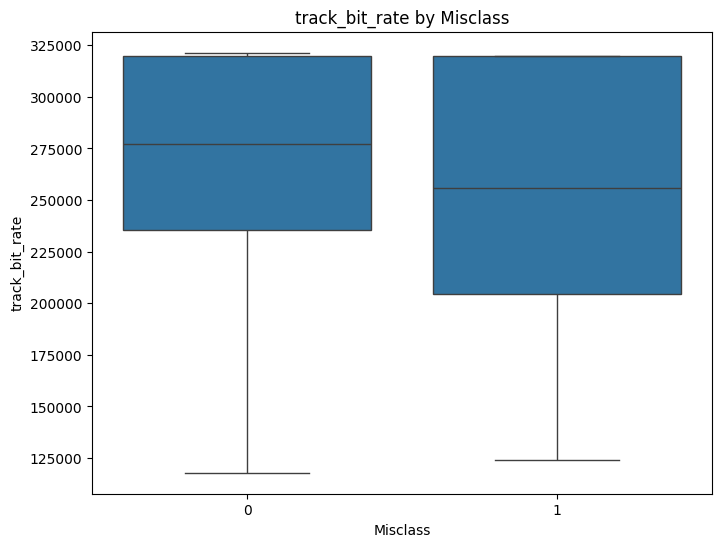

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=X_test_preds, x='misclass', y='track_bit_rate')
plt.title('track_bit_rate by Misclass')
plt.xlabel('Misclass')
plt.ylabel('track_bit_rate')
plt.show()

In [68]:
from scipy import stats

columns_non_binary = ['track_bit_rate', 'track_duration', 'album_tracks', 'track_title_char_count']

for column in columns_non_binary:
    misclass_0 = X_test_preds[X_test_preds['misclass'] == 0][column]
    misclass_1 = X_test_preds[X_test_preds['misclass'] == 1][column]
    u_stat, p_value = stats.mannwhitneyu(misclass_0, misclass_1)
    print(column)
    print(f"Mann-Whitney-U-Test: U-statistic = {u_stat}, p-value = {p_value}")

track_bit_rate
Mann-Whitney-U-Test: U-statistic = 332274.0, p-value = 0.051555218946867404
track_duration
Mann-Whitney-U-Test: U-statistic = 325931.5, p-value = 0.2506234644727585
album_tracks
Mann-Whitney-U-Test: U-statistic = 325831.0, p-value = 0.2544341099922035
track_title_char_count
Mann-Whitney-U-Test: U-statistic = 303728.0, p-value = 0.20315474678778656


In [67]:
from scipy.stats import chi2_contingency

columns_non_binary = ['track_bit_rate', 'track_duration', 'album_tracks', 'track_title_char_count']

for column in X_test_preds.columns:
    if column not in ['y_test', 'y_test_pred_xgb', 'misclass'] and column not in columns_non_binary:
        cross_tab = pd.crosstab(X_test_preds[column], X_test_preds['misclass'])
        chi2, p_value, _, _ = chi2_contingency(cross_tab)
        print(column)
        print(f"Chi-Square Statistik: {chi2}")
        print(f"P-Wert: {p_value}")

album_information_bin
Chi-Square Statistik: 0.054597487929671076
P-Wert: 0.8152481255862731
other_website
Chi-Square Statistik: 0.8905803200174361
P-Wert: 0.34532009514556883
soundcloud_website
Chi-Square Statistik: 0.28050229293684725
P-Wert: 0.5963721850396425
artist_bio_bin
Chi-Square Statistik: 0.008058750569933945
P-Wert: 0.9284695561390275
track_genre_top_Experimental
Chi-Square Statistik: 16.285946196660483
P-Wert: 5.446641882092443e-05
track_genre_top_Folk
Chi-Square Statistik: 0.16748313141623677
P-Wert: 0.6823583840705478
track_genre_top_Hip-Hop
Chi-Square Statistik: 0.01166772484436596
P-Wert: 0.9139820140857131
track_genre_top_Instrumental
Chi-Square Statistik: 1.988770274174506
P-Wert: 0.15846951740430715
track_genre_top_International
Chi-Square Statistik: 4.801446374605588
P-Wert: 0.028435854748731094
track_genre_top_Pop
Chi-Square Statistik: 0.9247083226675075
P-Wert: 0.33624174977097543
track_genre_top_Rock
Chi-Square Statistik: 3.7018993339651107
P-Wert: 0.054350566112